### Within the following work book analyzed the femaleclean4.csv, plotted bears using geospatial data, then performed additional female bear analysis using from the allbear.txt.

### femaleclean4.csv Exploratory Data Analysis

#### Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Create Useful functions

In [2]:
def autolabel(rects):
    """
    Purpose: Attach a text label above each bar displaying its height
    Reference: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    parameter 1: barplot variable (example below)
    ###fig = plt.figure(figsize=(17,12))
    ###ax = fig.add_subplot()
    ###rect1 = ax.barh(y=FSLC['Variables'], width=FSLC['ABSValue'], color='orange')
    ###ax.invert_yaxis()
    ###ax.set_ylabel('Features')
    ###ax.set_xlabel('Scores')
    ###ax.set_title('Female Pearson Correlation vs StepLength')
    ###autolabel(rects)
    ###plt.show()
    """

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with two decimal places
        label = "{:.2f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.

In [3]:
def cleanCorrelation(data, feature, number = 15):
    """
    Purpose: Create clean dataframe of selected correlation feature for plotting 
    parameter 1: Data = Dataframe
    parameter 2: Feature = Variable all features will be correlated against
    parameter 3: Number = Number of Rows to keep in final dataframe
    """

    #Create Correlation Dataframe
    correlationDF = pd.DataFrame(data.corr()[feature]).reset_index()
    newColumnTitle = feature + '_ABSValue'
    correlationDF[newColumnTitle] = abs(correlationDF[feature])
    correlationDF = correlationDF.sort_values(newColumnTitle, ascending=False)
    
    #Subset Correlation Dataframe based on number selected
    subsetCorrelationDF = correlationDF[0:number].copy()
    subsetCorrelationDF.columns.values[0] = 'Variables'
    subsetCorrelationDF = subsetCorrelationDF.reset_index()
    subsetCorrelationDF = subsetCorrelationDF.drop(columns='index')
    
    return(subsetCorrelationDF)
    
    

In [83]:
def gatherMonthlyFeature(data, feature):
    """
    Purpose: Create clean dataframe for boxplot plotting 
    parameter 1: Data = Dataframe
    parameter 2: Feature = Variable that will be boxplotted
    """

    dataList = []
    labelList = []
    
    uniqueMonths = pd.unique(data['month'])
    
    
    for i in uniqueMonths:
        dataList.append(data[feature][data['month'] == i])
        #labelList.append('month_' + str(i))
        labelList.append(i)
    
    d = {'X':dataList,'labels':labelList}
    final = pd.DataFrame(d)
    
    return(final)

#### Start of Analysis

#### Note within our analysis, we will be analyzing only the Observed (=1) rows.

In [5]:
female_df = pd.read_csv('femaleclean4.csv')

C:\Users\Armando\Anaconda3\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
female_df.head()

,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,month,...,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
0,0.0,0.0,7.0,0.0,122.738490,329.371060,332.177023,1.0,6/15/2010 13:27,6.0,...,1.0,1.0,1.0,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1.0,1.619778
1,1.0,0.0,7.0,1.0,-5.737794,772.495631,203.700739,0.0,6/15/2010 13:27,6.0,...,1.0,1.0,0.0,-272.138077,-488.364624,67.082039,-400.249908,67.082039,1.0,-0.344894
2,2.0,0.0,7.0,2.0,87.569036,246.697168,297.007568,0.0,6/15/2010 13:27,6.0,...,1.0,1.0,1.0,-298.962687,-400.249908,-192.093735,-400.249908,-192.093735,1.0,-0.424354
3,3.0,0.0,7.0,3.0,-30.052654,196.035093,179.385878,0.0,6/15/2010 13:27,6.0,...,1.0,1.0,1.0,-478.775482,-530.754150,-400.249908,-400.249908,-510.000000,1.0,-0.409867
4,4.0,0.0,7.0,4.0,114.929669,458.164645,324.368201,0.0,6/15/2010 13:27,6.0,...,1.0,1.0,0.0,-188.352223,-400.249908,60.000000,-400.249908,60.000000,1.0,-0.425339


In [7]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26467 entries, 0 to 26466
Data columns (total 68 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID         22990 non-null  float64
 1   Id          22990 non-null  float64
 2   Bear_ID     22990 non-null  float64
 3   SAMPLEID    22990 non-null  float64
 4   TURNANGLE   22990 non-null  float64
 5   STEPLENGTH  22990 non-null  float64
 6   BEARING     22990 non-null  float64
 7   OBSERVED    22990 non-null  float64
 8   datetime    22990 non-null  object 
 9   month       22990 non-null  float64
 10  CLUSTER     26467 non-null  object 
 11  disagLWM    22990 non-null  float64
 12  disagMIN    22990 non-null  float64
 13  disagMAX    22990 non-null  float64
 14  disagBEG    22990 non-null  float64
 15  disagEND    22990 non-null  float64
 16  disforLWM   22990 non-null  float64
 17  disforMIN   22990 non-null  float64
 18  disforMAX   22990 non-null  float64
 19  disforBEG   22990 non-nul

In [8]:
femaleObservedDf = female_df[female_df['OBSERVED'] == 1]
femaleObservedDf.head()

,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,datetime,month,...,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
0,0.0,0.0,7.0,0.0,122.738490,329.371060,332.177023,1.0,6/15/2010 13:27,6.0,...,1.0,1.0,1.0,-256.918925,-400.249908,-108.166542,-400.249908,-108.166542,1.0,1.619778
11,11.0,0.0,7.0,11.0,-163.857763,596.801120,168.319259,1.0,6/15/2010 20:27,6.0,...,1.0,1.0,1.0,-333.297213,-496.588348,-108.166542,-108.166542,-416.773315,2.0,1.887523
22,22.0,0.0,7.0,22.0,-150.260818,554.762369,18.058442,1.0,6/16/2010 0:27,6.0,...,1.0,1.0,1.0,-419.938047,-550.726807,-258.069763,-416.773315,-258.069763,3.0,1.712916
33,33.0,0.0,7.0,33.0,96.365383,617.323955,114.423824,1.0,6/16/2010 10:26,6.0,...,1.0,1.0,1.0,-306.522643,-417.851654,-169.705627,-258.069763,-169.705627,4.0,1.732025
44,44.0,0.0,7.0,44.0,50.005390,363.594567,164.429215,1.0,6/16/2010 23:26,6.0,...,1.0,1.0,1.0,-151.907745,-234.307495,-60.000000,-169.705627,-60.000000,5.0,1.726947


### Calculate Pearson Correlation of all features vs chosen variable, get top 15 correlated features, and plot.

The following features were chosen for our first tests since they help explain how far and angle of a traveling bear.
- StepLength
- TurnAngle
- Bearing

NOTE: ALL PLOTS ARE DISPLAYED WITH THE ABSOLUTE VALUE PEARSON CORRELATION FOR RANKING PURPOSES


#### Step Length - The distance from the origin step to the next step (measured in meters)

In [9]:
femStepLen = cleanCorrelation(femaleObservedDf, 'STEPLENGTH', 15)

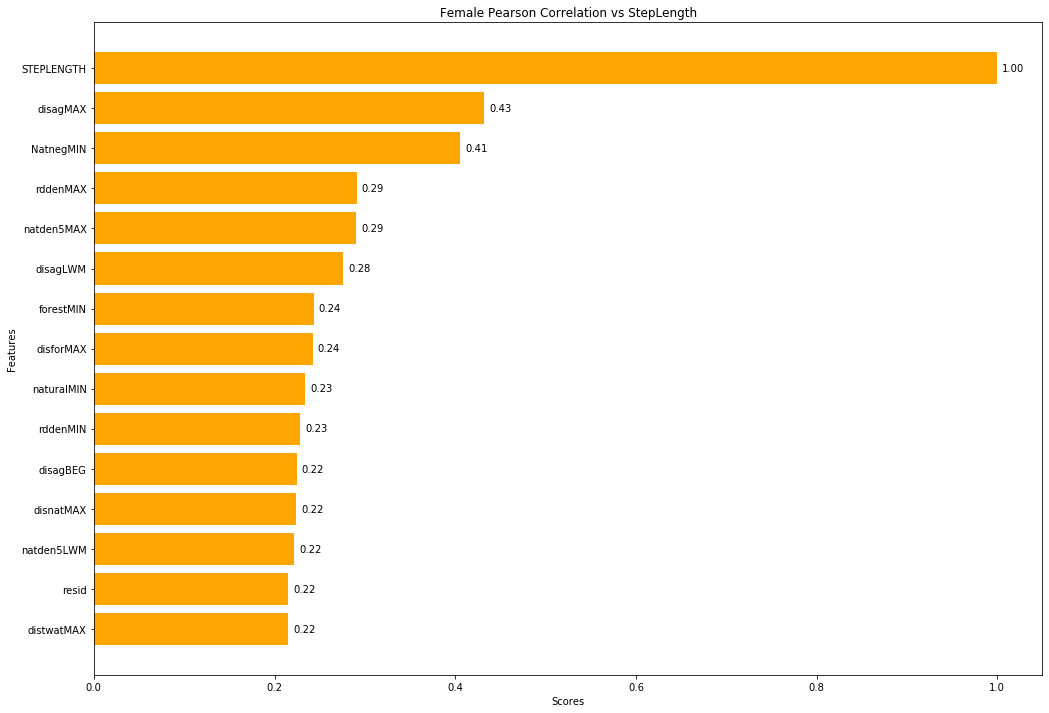

In [10]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femStepLen['Variables'], width=femStepLen['STEPLENGTH_ABSValue'], color='orange')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs StepLength')

autolabel(rect1)

plt.show()

NOTE: I will also be gathering the correlatation stats for the following features since they seem to have the highest correlations.  Furthermore, 'disagLWM' was ignored since the 'disag' category is already accounted for with 'disagMAX'.
- 'disagMAX', 
- 'NatnegMIN', 
- 'rddenMAX', 
- 'natden5MAX'
- 'forestMIN'

#### TurnAngle - the angular direction that the bear turned in it’s step compared to the previous step that the bear took (ranges from -180 to 180)

In [11]:
femTurnAngle = cleanCorrelation(femaleObservedDf, 'TURNANGLE', 10)

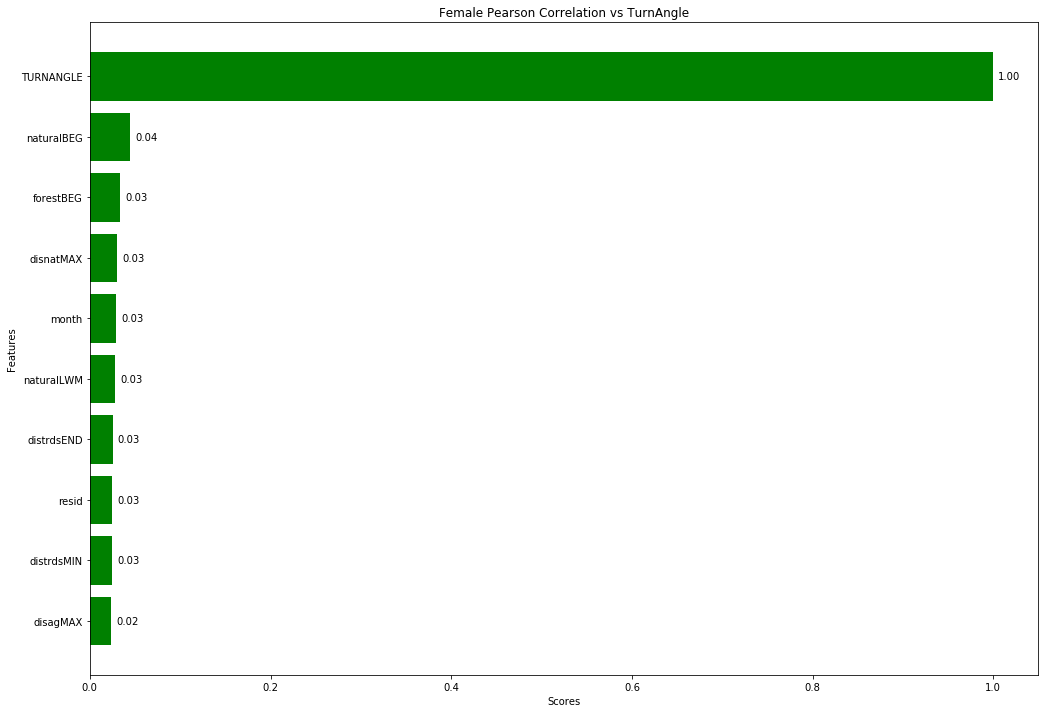

In [12]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect2 = ax.barh(y=femTurnAngle['Variables'], width=femTurnAngle['TURNANGLE_ABSValue'], color='green')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs TurnAngle')

autolabel(rect2)

plt.show()

#### Bearing - measures the angular direction of the step fron the origin (ranges from 0 to 359)

In [13]:
femBearing = cleanCorrelation(femaleObservedDf, 'BEARING', 10)

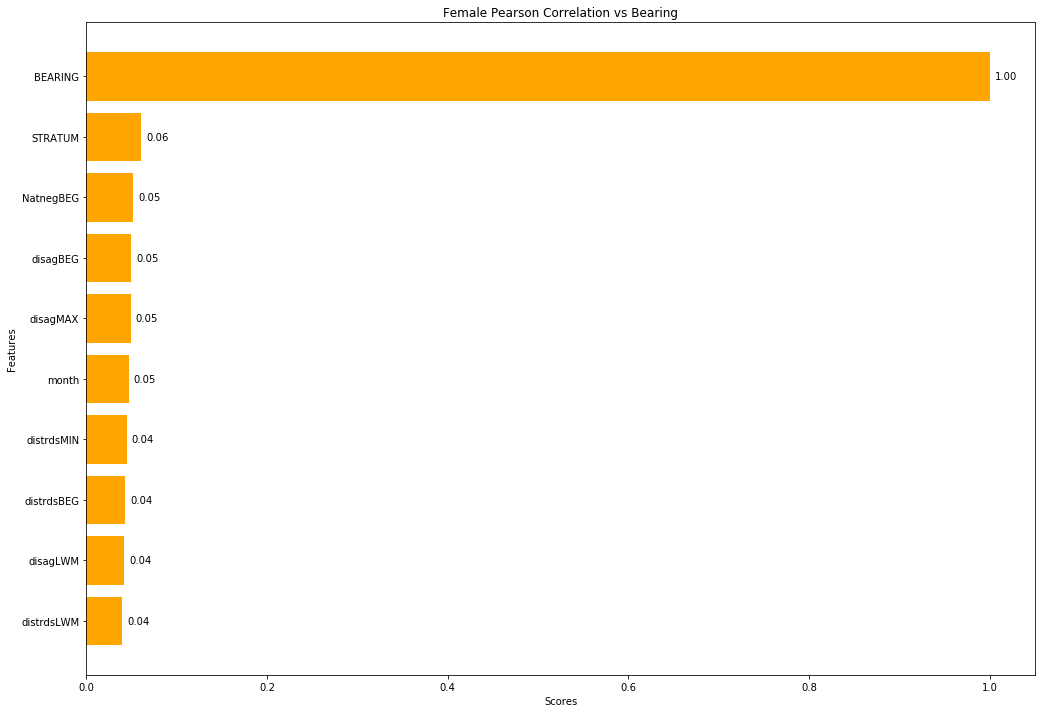

In [14]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femBearing['Variables'], width=femBearing['BEARING_ABSValue'], color='orange')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs Bearing')

autolabel(rect1)

plt.show()

#### Disag - measures the Euclidean distance the bear came from cultivated crops
- There are subvariables for minimum distance the bear came, maximum distance, and the distance from crops in the beginning and end of the step
- These are measured in meters


In [15]:
femdisagMAX = cleanCorrelation(femaleObservedDf, 'disagMAX', 15)

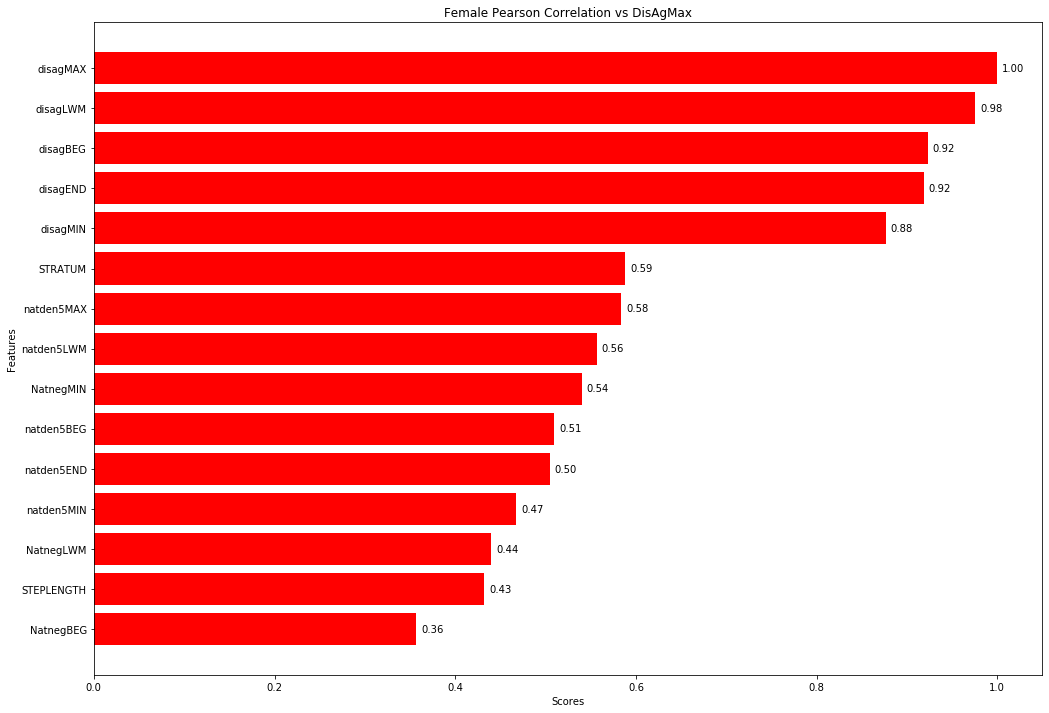

In [16]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femdisagMAX['Variables'], width=femdisagMAX['disagMAX_ABSValue'], color='red')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs DisAgMax')

autolabel(rect1)

plt.show()

#### Natneg - Unkown

In [17]:
femNatnegMIN = cleanCorrelation(femaleObservedDf, 'NatnegMIN', 15)

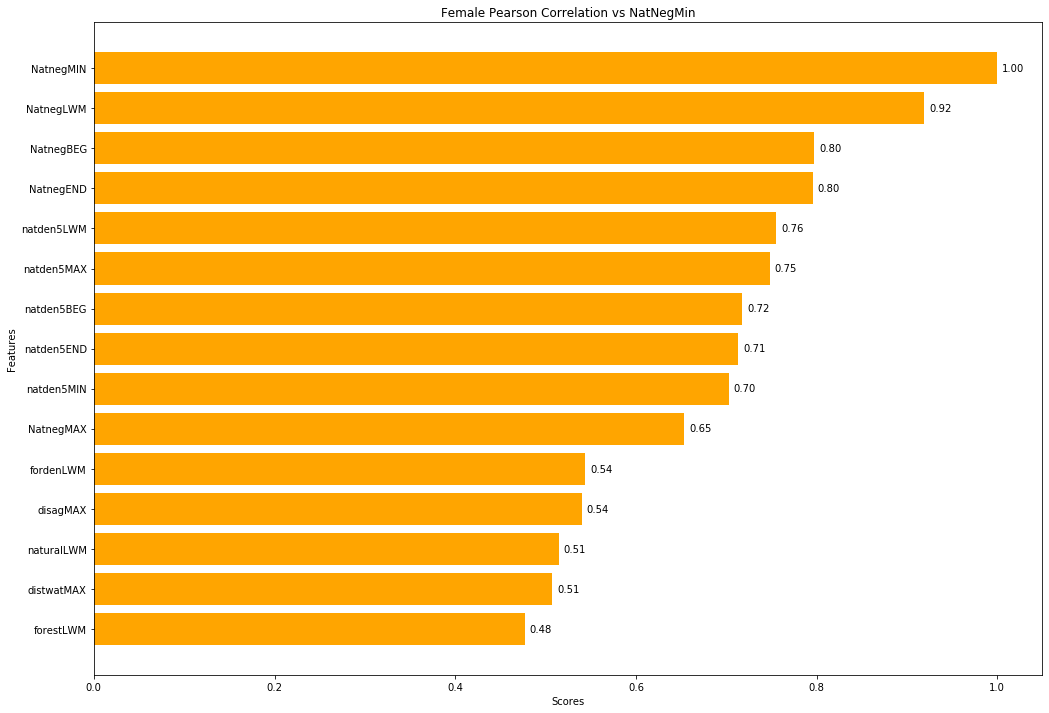

In [18]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femNatnegMIN['Variables'], width=femNatnegMIN['NatnegMIN_ABSValue'], color='orange')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs NatNegMin')

autolabel(rect1)

plt.show()

#### rdden - measures the percent density of the roadways the bear is in

In [19]:
femrddenMAX = cleanCorrelation(femaleObservedDf, 'rddenMAX', 15)

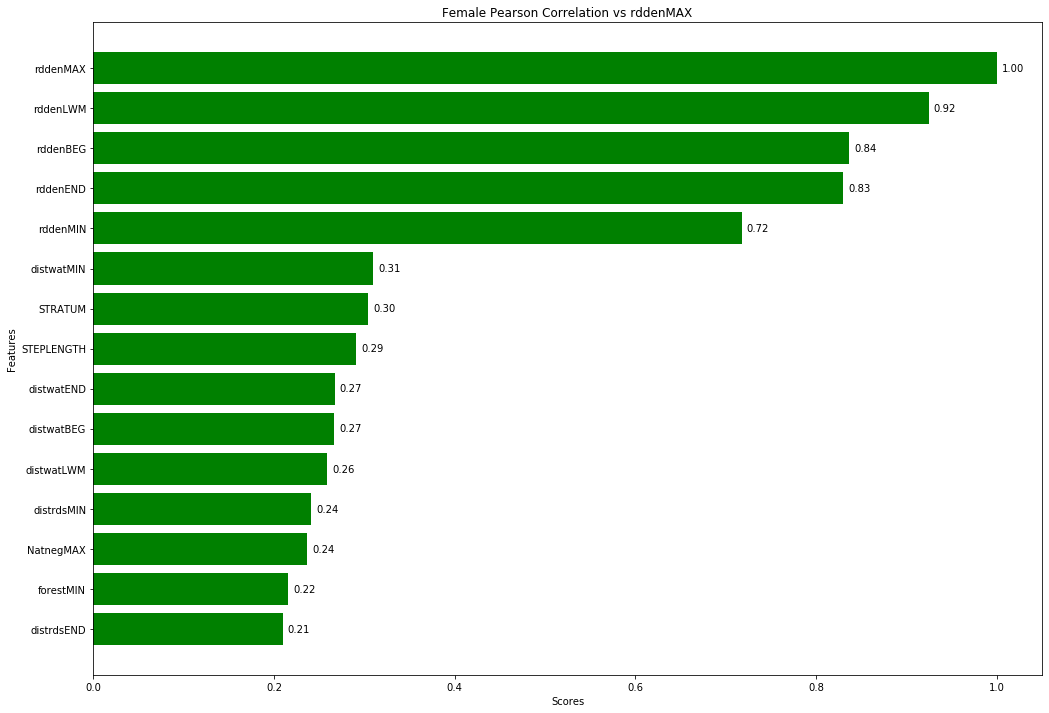

In [20]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femrddenMAX['Variables'], width=femrddenMAX['rddenMAX_ABSValue'], color='green')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs rddenMAX')

autolabel(rect1)

plt.show()

#### Natden - measures the percent density of the natural area (forest, shrubs, wetlands, etc.) the bear is in

In [21]:
femnatden5MAX = cleanCorrelation(femaleObservedDf, 'natden5MAX', 15)

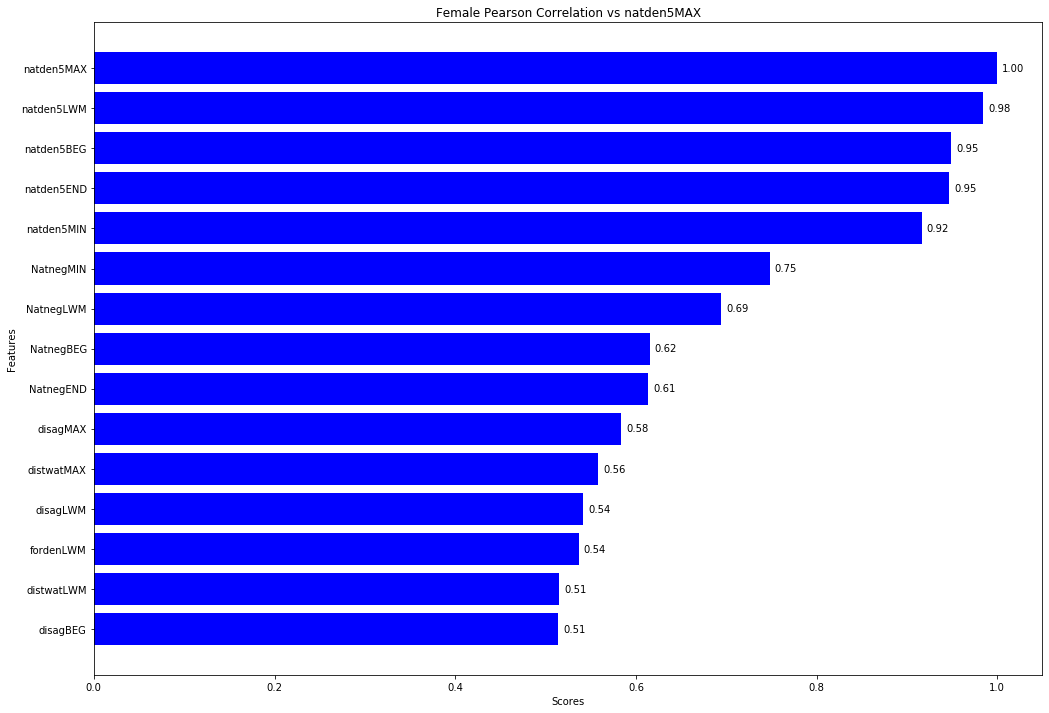

In [22]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femnatden5MAX['Variables'], width=femnatden5MAX['natden5MAX_ABSValue'], color='blue')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs natden5MAX')

autolabel(rect1)

plt.show()

#### forest - Unknown

In [23]:
femforestMIN = cleanCorrelation(femaleObservedDf, 'forestMIN', 15)

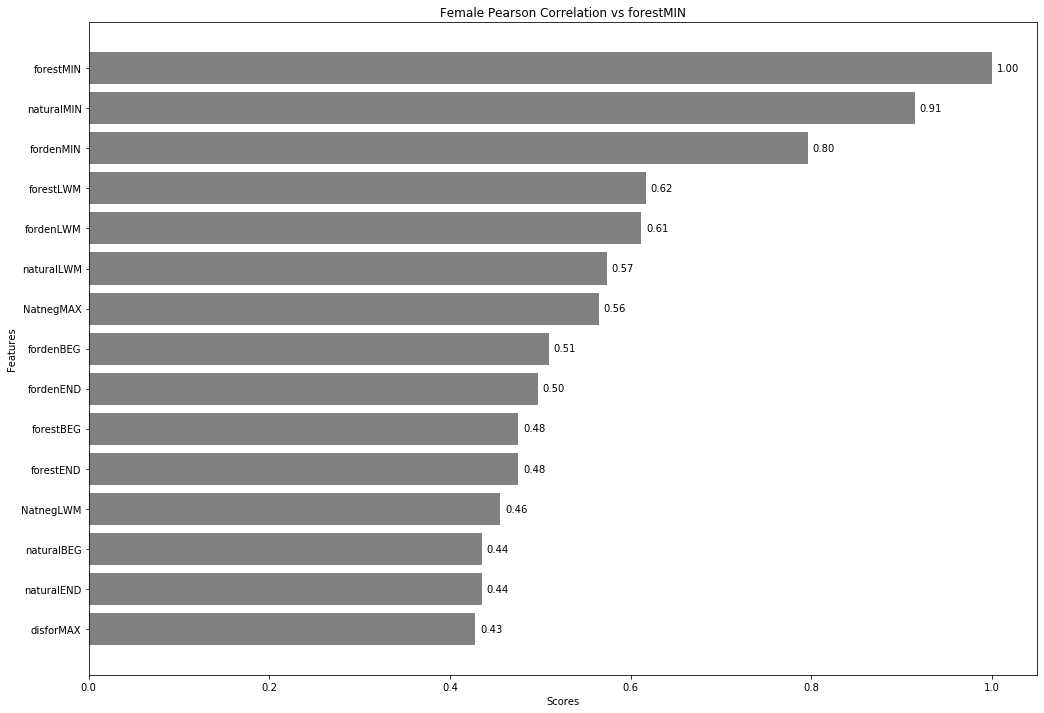

In [24]:
fig = plt.figure(figsize=(17,12))
ax = fig.add_subplot()
rect1 = ax.barh(y=femforestMIN['Variables'], width=femforestMIN['forestMIN_ABSValue'], color='grey')
ax.invert_yaxis()

ax.set_ylabel('Features')
ax.set_xlabel('Scores')
ax.set_title('Female Pearson Correlation vs forestMIN')

autolabel(rect1)

plt.show()

### Create Plots for each Bear ID for comparison

In [25]:
femaleObservedDf.describe()

,FID,Id,Bear_ID,SAMPLEID,TURNANGLE,STEPLENGTH,BEARING,OBSERVED,month,disagLWM,...,naturalMAX,naturalBEG,naturalEND,NatnegLWM,NatnegMIN,NatnegMAX,NatnegBEG,NatnegEND,STRATUM,resid
count,2090.000000,2090.0,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.0,2090.000000,2090.000000,...,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000
mean,2201.884211,0.0,208.804306,2201.884211,-2.073112,725.078544,178.330437,1.0,7.924880,597.550384,...,0.952632,0.756459,0.756459,-139.925095,-264.254203,-14.352617,-139.035549,-139.070410,1045.500000,1.610562
std,1554.830805,0.0,259.617127,1554.830805,102.716494,892.404468,103.551030,0.0,1.981872,846.434302,...,0.212476,0.429321,0.429321,243.032353,299.978861,232.663996,262.035385,262.044005,603.475352,0.301016
min,0.000000,0.0,7.000000,0.000000,-179.988720,6.688525,0.059559,1.0,4.000000,0.000000,...,0.000000,0.000000,0.000000,-1152.712813,-1350.000000,-1103.086548,-1231.097046,-1231.097046,1.000000,0.186245
25%,902.000000,0.0,20.000000,902.000000,-81.247597,206.921608,88.922844,1.0,6.000000,41.070855,...,1.000000,1.000000,1.000000,-207.348903,-360.000000,-67.082039,-192.093735,-192.093735,523.250000,1.490809
50%,1947.000000,0.0,71.000000,1947.000000,-2.308805,428.738237,177.300602,1.0,8.000000,142.024125,...,1.000000,1.000000,1.000000,-78.496498,-152.970581,30.000000,-67.082039,-67.082039,1045.500000,1.630683
75%,3311.000000,0.0,375.000000,3311.000000,78.477985,895.823191,269.983821,1.0,10.000000,926.743919,...,1.000000,1.000000,1.000000,-10.666909,-67.082039,67.082039,-30.000000,-30.000000,1567.750000,1.752151
max,6336.000000,0.0,714.000000,6336.000000,179.977701,12694.843600,359.941295,1.0,11.000000,4329.002577,...,1.000000,1.000000,1.000000,900.194144,842.140137,960.000000,960.000000,960.000000,2090.000000,4.270809


In [26]:
#Identify all unique bearIDs
uniqueBearIDs = pd.unique(femaleObservedDf.Bear_ID)
uniqueBearIDs

array([  7.,  18.,  20.,  71., 713., 714., 375.])

In [27]:
#Subset the dataframe for each bear ID
bearID_7 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 7]
bearID_18 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 18]
bearID_20 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 20]
bearID_71 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 71]
bearID_713 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 713]
bearID_714 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 714]
bearID_375 = femaleObservedDf[femaleObservedDf['Bear_ID'] == 375]


In [76]:
###gatherMonthlyFeature(data, feature):
steps7DF = gatherMonthlyFeature(bearID_7, 'STEPLENGTH')
steps18DF = gatherMonthlyFeature(bearID_18, 'STEPLENGTH')
steps20DF = gatherMonthlyFeature(bearID_20, 'STEPLENGTH')
steps71DF = gatherMonthlyFeature(bearID_71, 'STEPLENGTH')
steps713DF = gatherMonthlyFeature(bearID_713, 'STEPLENGTH')
steps714DF = gatherMonthlyFeature(bearID_714, 'STEPLENGTH')
steps375DF = gatherMonthlyFeature(bearID_375, 'STEPLENGTH')


BOXPLOTS OF STEPLENGTH BY MONTH FOR EACH BEAR ID


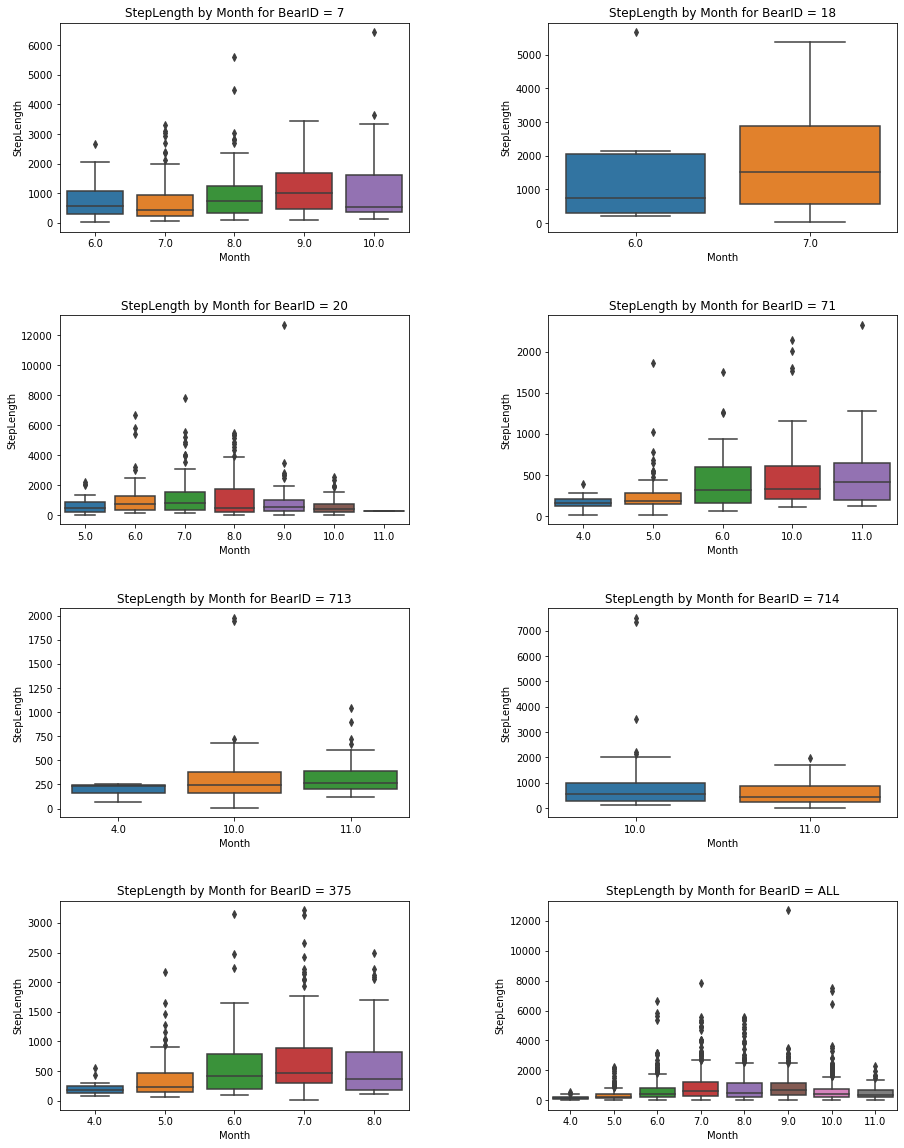

In [81]:
fig, axes = plt.subplots(4, 2, figsize = (15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = sns.boxplot(x="labels", y="X", data=steps7DF, orient='v', ax=axes[0,0])
ax.set_title('StepLength by Month for BearID = 7')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')

ax = sns.boxplot(x="labels", y="X", data=steps18DF, orient='v', ax=axes[0,1])
ax.set_title('StepLength by Month for BearID = 18')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=steps20DF, orient='v', ax=axes[1,0])
ax.set_title('StepLength by Month for BearID = 20')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=steps71DF, orient='v', ax=axes[1,1])
ax.set_title('StepLength by Month for BearID = 71')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=steps713DF, orient='v', ax=axes[2,0])
ax.set_title('StepLength by Month for BearID = 713')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=steps714DF, orient='v', ax=axes[2,1])
ax.set_title('StepLength by Month for BearID = 714')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=steps375DF, orient='v', ax=axes[3,0])
ax.set_title('StepLength by Month for BearID = 375')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


ax = sns.boxplot(x="month", y="STEPLENGTH", data=femaleObservedDf, orient='v', ax=axes[3,1])
ax.set_title('StepLength by Month for BearID = ALL')
ax.set_ylabel('StepLength')
ax.set_xlabel('Month')


print("BOXPLOTS OF STEPLENGTH BY MONTH FOR EACH BEAR ID")
plt.show()

In [84]:
###gatherMonthlyFeature(data, feature):
disagMAX7DF = gatherMonthlyFeature(bearID_7, 'disagMAX')
disagMAX18DF = gatherMonthlyFeature(bearID_18, 'disagMAX')
disagMAX20DF = gatherMonthlyFeature(bearID_20, 'disagMAX')
disagMAX71DF = gatherMonthlyFeature(bearID_71, 'disagMAX')
disagMAX713DF = gatherMonthlyFeature(bearID_713, 'disagMAX')
disagMAX714DF = gatherMonthlyFeature(bearID_714, 'disagMAX')
disagMAX375DF = gatherMonthlyFeature(bearID_375, 'disagMAX')

BOXPLOTS OF disagMAX BY MONTH FOR EACH BEAR ID


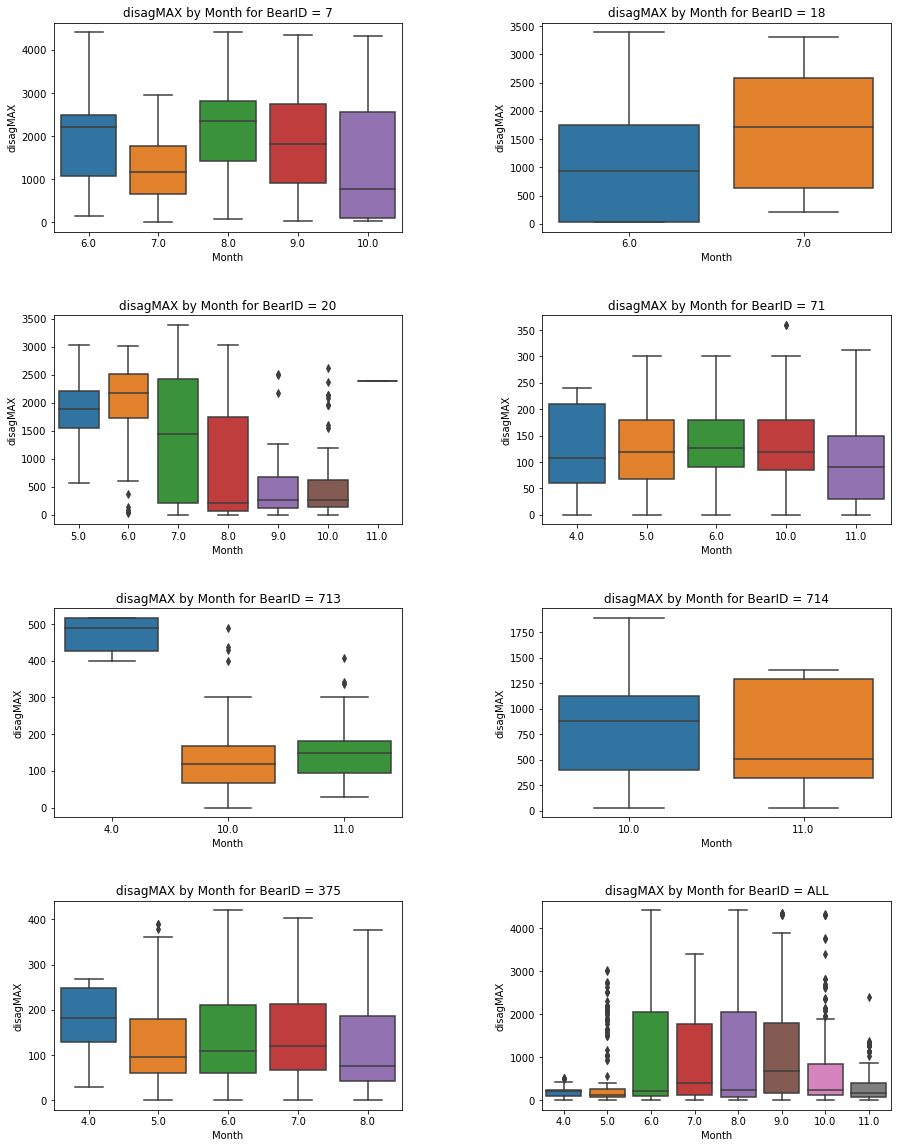

In [85]:
fig, axes = plt.subplots(4, 2, figsize = (15,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = sns.boxplot(x="labels", y="X", data=disagMAX7DF, orient='v', ax=axes[0,0])
ax.set_title('disagMAX by Month for BearID = 7')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')

ax = sns.boxplot(x="labels", y="X", data=disagMAX18DF, orient='v', ax=axes[0,1])
ax.set_title('disagMAX by Month for BearID = 18')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=disagMAX20DF, orient='v', ax=axes[1,0])
ax.set_title('disagMAX by Month for BearID = 20')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=disagMAX71DF, orient='v', ax=axes[1,1])
ax.set_title('disagMAX by Month for BearID = 71')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=disagMAX713DF, orient='v', ax=axes[2,0])
ax.set_title('disagMAX by Month for BearID = 713')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=disagMAX714DF, orient='v', ax=axes[2,1])
ax.set_title('disagMAX by Month for BearID = 714')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="labels", y="X", data=disagMAX375DF, orient='v', ax=axes[3,0])
ax.set_title('disagMAX by Month for BearID = 375')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


ax = sns.boxplot(x="month", y="disagMAX", data=femaleObservedDf, orient='v', ax=axes[3,1])
ax.set_title('disagMAX by Month for BearID = ALL')
ax.set_ylabel('disagMAX')
ax.set_xlabel('Month')


print("BOXPLOTS OF disagMAX BY MONTH FOR EACH BEAR ID")
plt.show()

# EDA on allbear9att_update.txt

##### Plot all bears using GPS coordinates
Tutorial Reference:  https://www.datacamp.com/community/tutorials/geospatial-data-python

In [1]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

#import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
allbear9att_df = pd.read_csv('allbear9att_update.txt', sep='\t')

In [7]:
allbear9att_df.head()

,OBJECTID,Bear_ID,Ordering,Latitude,Longitude,GPS_Fix_Time,GPS_Latitude,GPS_Longitude,Sex,TURNANGLE,STEPLENGTH,BEARING,TIMEINTVL
0,1,2,1,29.761,-91.520,4/4/12 20:02,3293240.878,643056.8972,1,-999.000000,194.604790,246.161846,7087
1,2,2,2,29.761,-91.522,4/4/12 22:00,3293162.227,642878.8940,1,-55.182466,11.432054,190.979379,7255
2,3,2,3,29.760,-91.522,4/5/12 0:01,3293151.004,642876.7166,1,-74.719608,18.557928,116.259770,7144
3,4,2,4,29.760,-91.522,4/5/12 2:00,3293142.794,642893.3593,1,-84.118367,3.563086,32.141403,7200
4,5,2,5,29.760,-91.522,4/5/12 4:00,3293145.810,642895.2549,1,53.761039,7.555813,85.902443,7278


In [3]:
# Getting to know GEOJSON file:
country = geopandas.read_file("gz_2010_us_040_00_500k.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


In [4]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

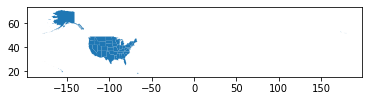

In [5]:
country.plot()

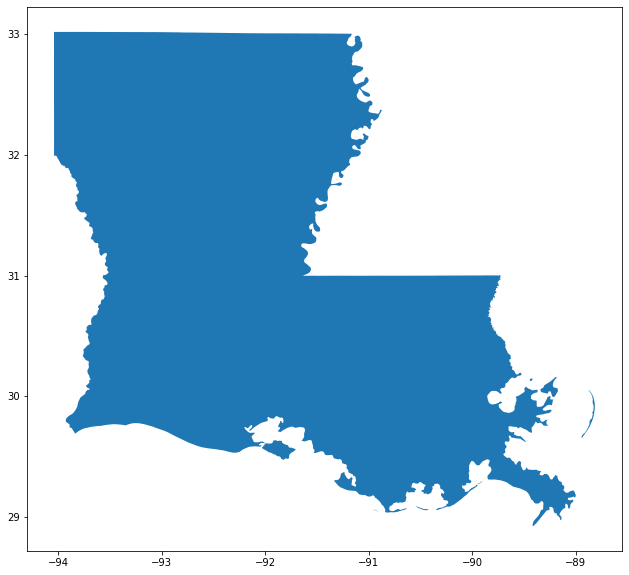

In [6]:
country[country['NAME'].isin(['Louisiana']) == True].plot(figsize=(15,10))

In [8]:
# Combining Lattitude and Longitude to create coordinates:
allbear9att_df['coordinates'] = allbear9att_df[['Longitude', 'Latitude']].values.tolist()
allbear9att_df.head()

,OBJECTID,Bear_ID,Ordering,Latitude,Longitude,GPS_Fix_Time,GPS_Latitude,GPS_Longitude,Sex,TURNANGLE,STEPLENGTH,BEARING,TIMEINTVL,coordinates
0,1,2,1,29.761,-91.520,4/4/12 20:02,3293240.878,643056.8972,1,-999.000000,194.604790,246.161846,7087,"[-91.52, 29.761]"
1,2,2,2,29.761,-91.522,4/4/12 22:00,3293162.227,642878.8940,1,-55.182466,11.432054,190.979379,7255,"[-91.522, 29.761]"
2,3,2,3,29.760,-91.522,4/5/12 0:01,3293151.004,642876.7166,1,-74.719608,18.557928,116.259770,7144,"[-91.522, 29.76]"
3,4,2,4,29.760,-91.522,4/5/12 2:00,3293142.794,642893.3593,1,-84.118367,3.563086,32.141403,7200,"[-91.522, 29.76]"
4,5,2,5,29.760,-91.522,4/5/12 4:00,3293145.810,642895.2549,1,53.761039,7.555813,85.902443,7278,"[-91.522, 29.76]"


In [9]:
# Change the coordinates to a geoPoint
allbear9att_df['coordinates'] = allbear9att_df['coordinates'].apply(Point)
allbear9att_df.head()

,OBJECTID,Bear_ID,Ordering,Latitude,Longitude,GPS_Fix_Time,GPS_Latitude,GPS_Longitude,Sex,TURNANGLE,STEPLENGTH,BEARING,TIMEINTVL,coordinates
0,1,2,1,29.761,-91.520,4/4/12 20:02,3293240.878,643056.8972,1,-999.000000,194.604790,246.161846,7087,POINT (-91.52 29.761)
1,2,2,2,29.761,-91.522,4/4/12 22:00,3293162.227,642878.8940,1,-55.182466,11.432054,190.979379,7255,POINT (-91.52200000000001 29.761)
2,3,2,3,29.760,-91.522,4/5/12 0:01,3293151.004,642876.7166,1,-74.719608,18.557928,116.259770,7144,POINT (-91.52200000000001 29.76)
3,4,2,4,29.760,-91.522,4/5/12 2:00,3293142.794,642893.3593,1,-84.118367,3.563086,32.141403,7200,POINT (-91.52200000000001 29.76)
4,5,2,5,29.760,-91.522,4/5/12 4:00,3293145.810,642895.2549,1,53.761039,7.555813,85.902443,7278,POINT (-91.52200000000001 29.76)


In [10]:
type(allbear9att_df['coordinates'])

pandas.core.series.Series

In [11]:
# Convert the count df to geodf
allbear9att_geodf = geopandas.GeoDataFrame(allbear9att_df, geometry='coordinates')
allbear9att_geodf.head()

,OBJECTID,Bear_ID,Ordering,Latitude,Longitude,GPS_Fix_Time,GPS_Latitude,GPS_Longitude,Sex,TURNANGLE,STEPLENGTH,BEARING,TIMEINTVL,coordinates
0,1,2,1,29.761,-91.520,4/4/12 20:02,3293240.878,643056.8972,1,-999.000000,194.604790,246.161846,7087,POINT (-91.52000 29.76100)
1,2,2,2,29.761,-91.522,4/4/12 22:00,3293162.227,642878.8940,1,-55.182466,11.432054,190.979379,7255,POINT (-91.52200 29.76100)
2,3,2,3,29.760,-91.522,4/5/12 0:01,3293151.004,642876.7166,1,-74.719608,18.557928,116.259770,7144,POINT (-91.52200 29.76000)
3,4,2,4,29.760,-91.522,4/5/12 2:00,3293142.794,642893.3593,1,-84.118367,3.563086,32.141403,7200,POINT (-91.52200 29.76000)
4,5,2,5,29.760,-91.522,4/5/12 4:00,3293145.810,642895.2549,1,53.761039,7.555813,85.902443,7278,POINT (-91.52200 29.76000)


In [12]:
type(allbear9att_geodf)

geopandas.geodataframe.GeoDataFrame

In [13]:
type(allbear9att_geodf['coordinates'])

geopandas.geoseries.GeoSeries

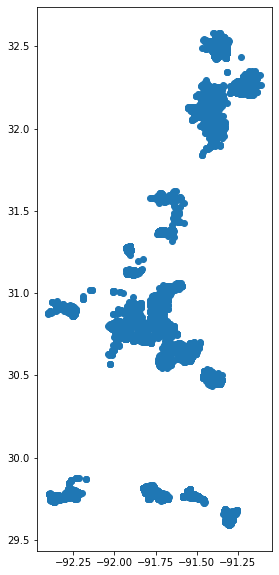

In [14]:
allbear9att_geodf.plot(figsize=(20,10))

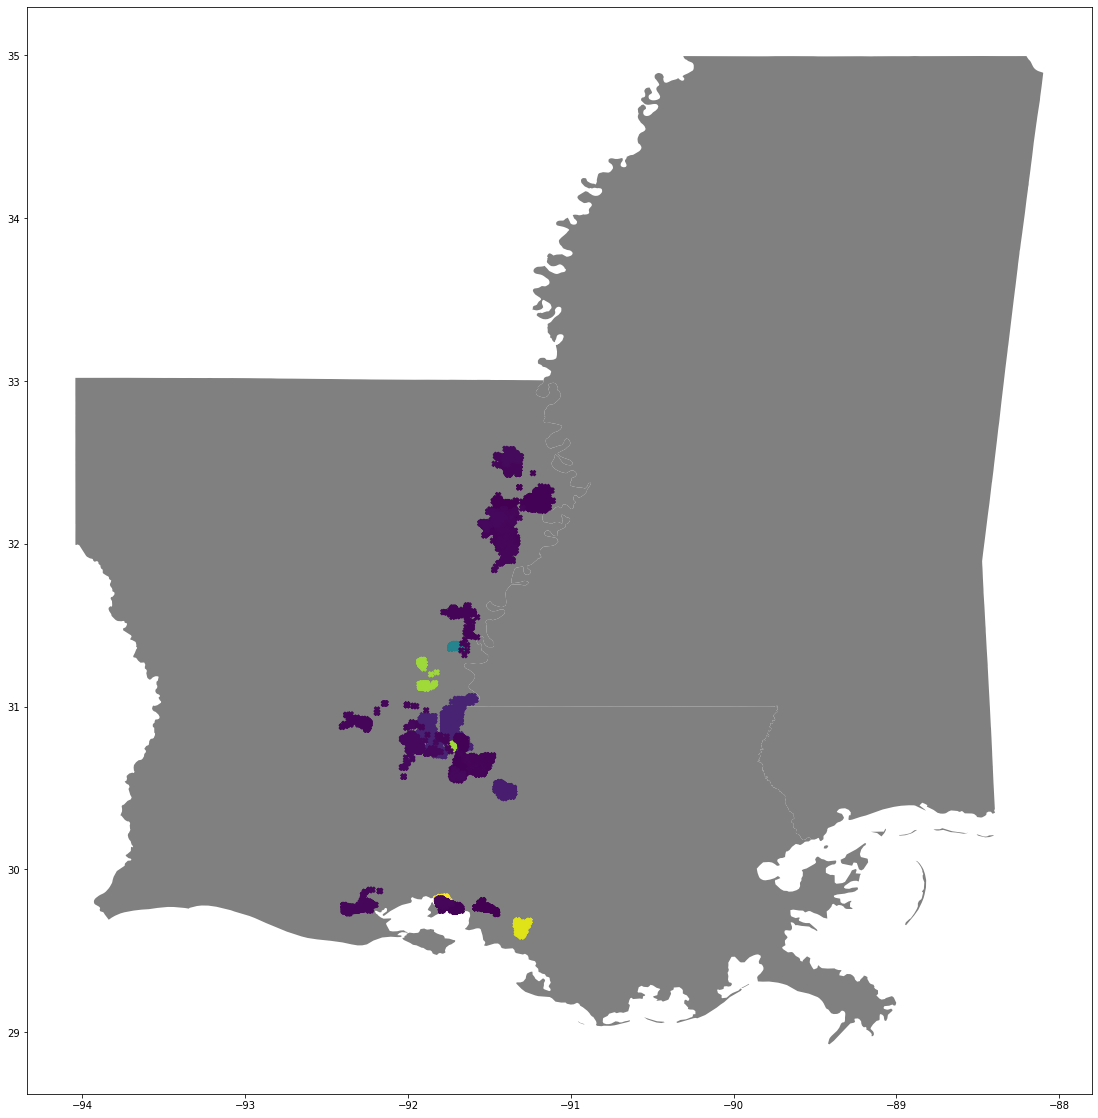

In [16]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Louisiana', 'Mississippi']) == True].plot(ax=ax, color='grey')

# plotting the hurricane position on top with red color to stand out:
allbear9att_geodf.plot(ax=base, column='Bear_ID', marker="X", markersize=30);

### Continue with female analysis

In [121]:
bear9att_female = allbear9att_df[allbear9att_df['Sex']==2]

In [122]:
bear9att_female.head()

,OBJECTID,Bear_ID,Ordering,Latitude,Longitude,GPS_Fix_Time,GPS_Latitude,GPS_Longitude,Sex,TURNANGLE,STEPLENGTH,BEARING,TIMEINTVL
1650,1651,71,1,30.768,-91.741,10/16/11 20:53,3404617.944,620506.6361,2,-999.000000,6.486240,351.724361,3566
1651,1652,71,2,30.769,-91.741,10/16/11 21:52,3404624.363,620505.7025,2,131.470703,4.378883,123.195065,3648
1652,1653,71,3,30.768,-91.741,10/16/11 22:53,3404621.965,620509.3668,2,-2.180239,8.658349,121.014825,3612
1653,1654,71,4,30.768,-91.741,10/16/11 23:53,3404617.504,620516.7873,2,21.322463,19.712707,142.337289,7648
1654,1655,71,5,30.768,-91.741,10/17/11 2:01,3404601.899,620528.8320,2,-94.676434,1.666325,47.660854,7202


In [150]:
pd.unique(bear9att_female.Bear_ID)

array([ 71, 375, 713, 714,   7,  18,  20], dtype=int64)

In [123]:
femLong = cleanCorrelation(bear9att_female, 'Longitude', 15)

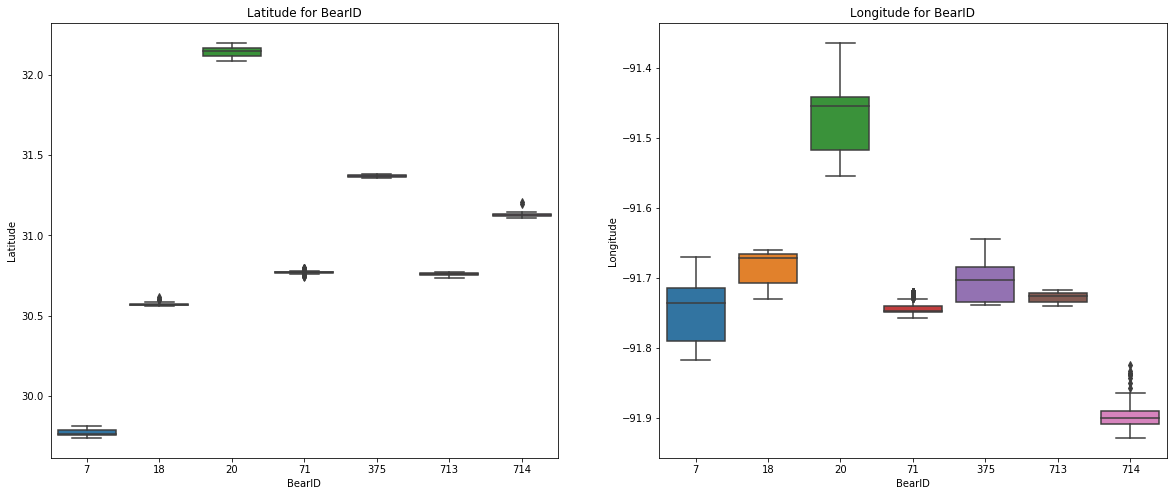

In [142]:
fig, axes = plt.subplots(1, 2, figsize = (20,8))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = sns.boxplot(x="Bear_ID", y="Latitude", data=bear9att_female, orient='v', ax=axes[0])
ax.set_title('Latitude for BearID')
ax.set_ylabel('Latitude')
ax.set_xlabel('BearID')

ax = sns.boxplot(x="Bear_ID", y="Longitude", data=bear9att_female, orient='v', ax=axes[1])
ax.set_title('Longitude for BearID')
ax.set_ylabel('Longitude')
ax.set_xlabel('BearID')

plt.show()

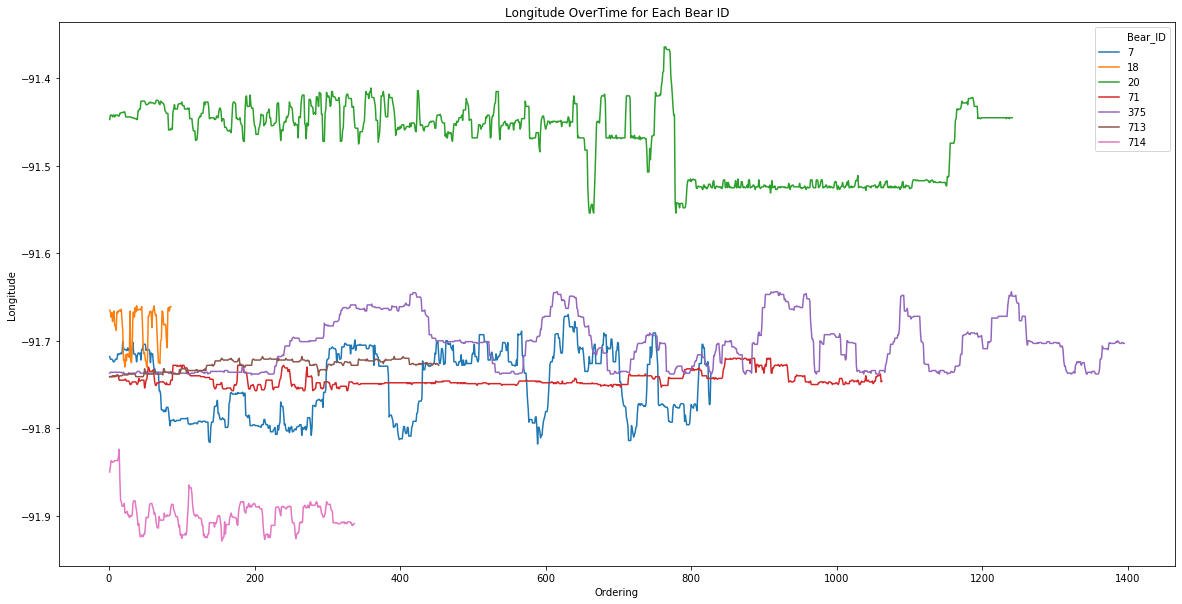

In [156]:
fig= plt.subplots(figsize = (20,10))

b7 = sns.lineplot(x = "Ordering", y = "Longitude", hue='Bear_ID', style='Bear_ID', palette='tab10', dashes = False, data=bear9att_female, ci=None)
b7.set_title('Longitude OverTime for Each Bear ID')
b7.set_ylabel('Longitude')
b7.set_xlabel('Ordering')

plt.show()

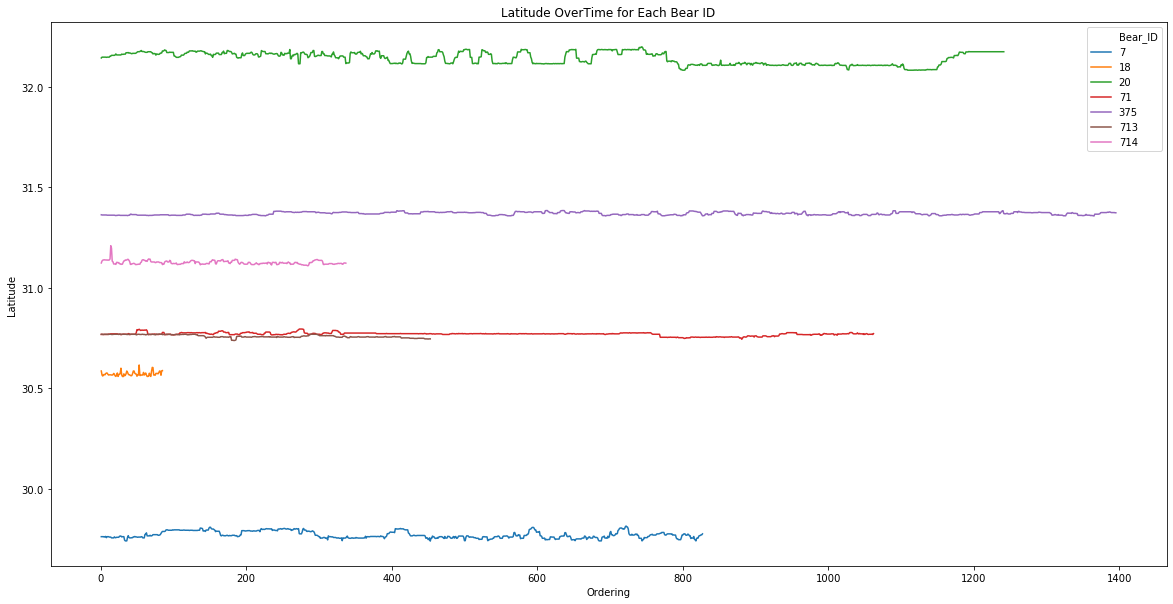

In [157]:
fig= plt.subplots(figsize = (20,10))

b7 = sns.lineplot(x = "Ordering", y = "Latitude", hue='Bear_ID', style='Bear_ID', palette='tab10', dashes = False, data=bear9att_female, ci=None)
b7.set_title('Latitude OverTime for Each Bear ID')
b7.set_ylabel('Latitude')
b7.set_xlabel('Ordering')

plt.show()

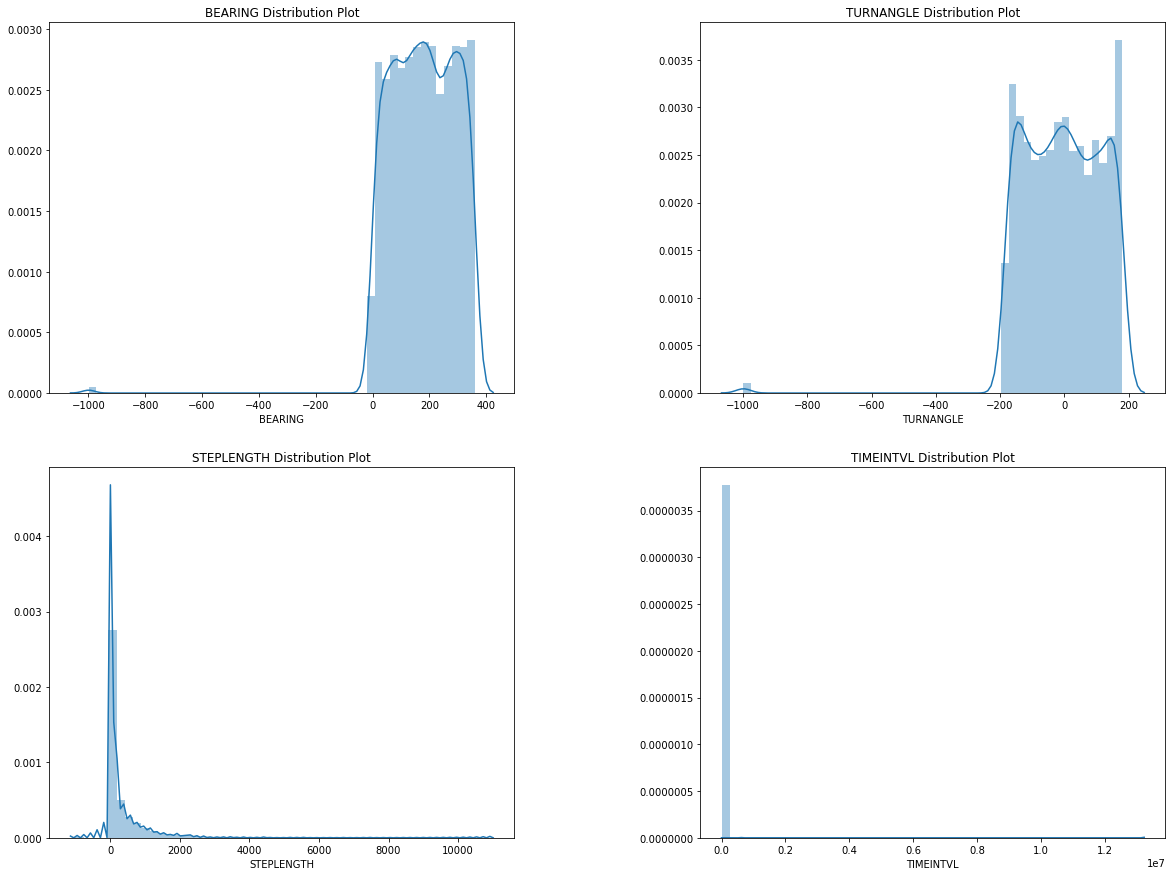

In [187]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
fig.subplots_adjust(hspace=0.2, wspace=0.4)

ax = sns.distplot(bear9att_female["BEARING"], ax=axes[0,0])
ax.set_title('BEARING Distribution Plot')

ax = sns.distplot(bear9att_female["TURNANGLE"], ax=axes[0,1])
ax.set_title('TURNANGLE Distribution Plot')

ax = sns.distplot(bear9att_female["STEPLENGTH"], ax=axes[1,0])
ax.set_title('STEPLENGTH Distribution Plot')

ax = sns.distplot(bear9att_female["TIMEINTVL"], ax=axes[1,1])
ax.set_title('TIMEINTVL Distribution Plot')

plt.show()

# Excess Code Below